# Programming Assignment: Размер случайного леса

Данное задание основано на материалах лекций по логическим методам и направлено на знакомство со случайными лесами (`Random Forests`).

## Вы научитесь:

* работать со случайным лесом — одним из наиболее распространенных семейств алгоритмов
* решать с его помощью задачи регрессии
* подбирать параметры случайного леса

## Введение

Случайный лес — это модель классификации, объединяющая некоторое количество решающих деревьев в одну композицию, за счет чего улучшается их качество работы и обобщающая способность. Деревья строятся независимо друг от друга. Чтобы они отличались друг от друга, обучение проводится не на всей обучающей выборке, а на ее случайном подмножестве. Также, для дальнейшего уменьшения схожести деревьев, оптимальный признак для разбиения выбирается не из всех возможных признаков, а лишь из их случайного подмножества. Прогнозы, выданные деревьями, объединяются в один ответ путем усреднения.

Особенность случайного леса заключается в том, что он не переобучается по мере увеличения количества деревьев в композиции. Это достигается за счет того, что деревья не зависят друг от друга, и поэтому добавление нового дерева в композицию не усложняет модель, а лишь понижает уровень шума в прогнозах.

## Реализация в Scikit-Learn

В библиотеке `scikit-learn` случайные леса реализованы в классах `sklearn.ensemble.RandomForestClassifier` (для классификации) и `sklearn.ensemble.RandomForestRegressor` (для регрессии). Обучение модели производится с помощью функции `fit`, построение прогнозов — с помощью функции `predict`. Число деревьев задается с помощью поля класса `n_estimators`.

Пример использования:

Также в этом задании вам понадобится вычислять качество предсказаний на тестовой выборке. Мы будем пользоваться метрикой `R2` — по сути, это среднеквадратичная ошибка (`MSE`), нормированная на отрезок [0, 1] и обращенная так, чтобы ее наилучшим значением была единица. Ее можно вычислить с помощью функции `sklearn.metrics.r2_score`. Первым аргументов является список правильных ответов на выборке, вторым — список предсказанных ответов. Пример использования:

## Инструкция по выполнению

В этом задании вам нужно проследить за изменением качества случайного леса в зависимости от количества деревьев в нем.

### Шаг 1:

Загрузите данные из файла `abalone.csv`. Это датасет, в котором требуется предсказать возраст ракушки (число колец) по физическим измерениям.

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score 
from sklearn.metrics import r2_score
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
def write_answer(ans, n):
    with open("ans{}.txt".format(n), "w") as fout:
        fout.write(str(ans))

In [3]:
data = pd.read_csv('abalone.csv')
data.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Шаг 2:

Преобразуйте признак `Sex` в числовой: значение `F` должно перейти в -1, `I` — в 0, `M` — в 1. Если вы используете `Pandas`, то подойдет следующий код: 

    data['Sex'] = data['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))

In [4]:
data['Sex'] = data['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))
data.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Шаг 3:
Разделите содержимое файлов на признаки и целевую переменную. В последнем столбце записана целевая переменная, в остальных — признаки.

In [5]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

### Шаг 4:

Обучите случайный лес (`sklearn.ensemble.RandomForestRegressor`) с различным числом деревьев: от 1 до 50 (не забудьте выставить `"random_state=1"` в конструкторе). Для каждого из вариантов оцените качество работы полученного леса на кросс-валидации по 5 блокам. Используйте параметры `"random_state=1"` и `"shuffle=True"` при создании генератора кросс-валидации `sklearn.cross_validation.KFold`. В качестве меры качества воспользуйтесь коэффициентом детерминации (`sklearn.metrics.r2_score`).

In [6]:
scores = {}

cv = KFold(n_splits=5, random_state=1, shuffle=True)

for n in range(1, 51):
    clf = RandomForestRegressor(n_estimators=n, random_state=1)
    scores[n] = cross_val_score(clf, X, y, scoring='r2', cv=cv, n_jobs=-1).mean()

### Шаг 5:
Определите, при каком минимальном количестве деревьев случайный лес показывает качество на кросс-валидации выше 0.52. Это количество и будет ответом на задание.

In [7]:
for n_trees, score in scores.items():
    if score > 0.52:
        print(n_trees)
        write_answer(n_trees, 1)
        break 

21


### Шаг 6:
Обратите внимание на изменение качества по мере роста числа деревьев. Ухудшается ли оно?

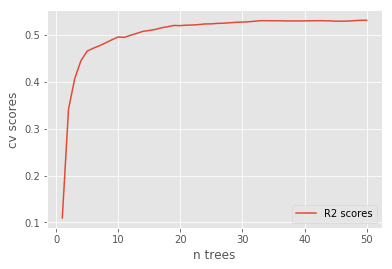

In [8]:
plt.plot(scores.keys(), scores.values(), label='R2 scores')
plt.xlabel('n trees')
plt.ylabel('cv scores')
plt.legend(loc='lower right')
plt.show()